<a href="https://colab.research.google.com/github/SolisProcopioUriel/SimulacionII/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install simpy
import simpy
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def warehouse_run(env, order_cutoff ,order_target):
  global inventory, balance, num_ordered

  inventory = order_target
  balance = 0.0
  num_ordered = 0

  while True:
    interarrival = generate_interarrival()
    yield env.timeout(interarrival)
    balance -= inventory*2*interarrival
    demand = generate_demand()
    if demand < inventory:
      balance += 100 * demand
      inventory -= demand
      print ('{:.2f} sold {}'.format(env.now, demand))
    else:
      balance += 100 * inventory
      inventory = 0
      print ('{:.2f} sold {} (out of stock)'.format(env.now, inventory))

    if inventory < order_cutoff and num_ordered == 0:
        env.process(handle_order(env, order_target))

La función warehouse_run es la función principal que simula el funcionamiento del almacén. Toma tres parámetros: env (el entorno de SimPy), order_cutoff (el nivel de inventario que desencadena un pedido) y order_target (la cantidad a pedir).

Dentro de la función, se inicializan las variables globales inventory (nivel de inventario), balance (balance financiero) y num_ordered (cantidad de artículos pedidos pero no recibidos). Luego, se inicia un bucle infinito.

En cada iteración del bucle, se genera un tiempo de llegada entre pedidos utilizando la función generate_interarrival. Se usa yield env.timeout(interarrival) para esperar ese tiempo en la simulación. A continuación, se actualiza el balance restando el costo de mantener el inventario durante el intervalo de tiempo.

Luego, se genera una demanda utilizando la función generate_demand. Si la demanda es menor que el inventario actual, se venden los artículos demandados, se actualiza el balance y se reduce el inventario. Se imprime un mensaje indicando la cantidad vendida.

Si la demanda es mayor o igual al inventario actual, se vende todo el inventario, se actualiza el balance y se establece el inventario en cero. Se imprime un mensaje indicando que el inventario está agotado.

Si el nivel de inventario cae por debajo del punto de corte establecido por order_cutoff y no hay pedidos pendientes, se inicia un proceso handle_order para realizar un pedido adicional.

In [3]:
def handle_order(env, order_target):
    global inventory, balance, num_ordered

    num_ordered = order_target - inventory
    print ('{:.2f} place order for {}'.format(env.now, num_ordered))
    balance-= 50* num_ordered
    yield env.timeout(2.0)
    inventory += num_ordered
    num_ordered= 0
    print ('{:.2f} received order, {} in inventory '.format(env.now, inventory))

La función handle_order se encarga de manejar el proceso de realizar un pedido adicional. Toma dos parámetros: env (el entorno de SimPy) y order_target (la cantidad a pedir).

Dentro de la función, se actualiza num_ordered para reflejar la cantidad de artículos pedidos pero no recibidos. Se reduce el balance en función del costo del pedido (50 es el costo por artículo). Luego, se espera un tiempo de 2.0 unidades de tiempo para simular el tiempo de entrega del pedido. Después de eso, se incrementa el inventario en la cantidad pedida y se restablece num_ordered a cero. Se imprime un mensaje indicando la recepción del pedido y el nivel actual de inventario.

In [4]:
def generate_interarrival():
  return np.random.exponential(1./5)

def generate_demand():
  return np.random.randint(1,5)

Estas funciones generan números aleatorios utilizados en la simulación. generate_interarrival genera tiempos de llegada entre pedidos a partir de una distribución exponencial. generate_demand genera una demanda aleatoria entre 1 y 4.

In [5]:
obs_time = []
inventory_level = []

def observe(env):
    global inventory

    while True :
        obs_time.append(env.now)
        inventory_level.append(inventory)
        yield env.timeout(0.1)

Estas líneas de código definen la función observe que se encarga de registrar el tiempo de la simulación (env.now) y el nivel de inventario en listas (obs_time y inventory_level, respectivamente). La función se ejecuta continuamente en un bucle infinito, registrando los valores cada 0.1 unidades de tiempo.

In [6]:
np.random.seed(2)

env=simpy.Environment()
env.process(warehouse_run(env,10,30))
env.process(observe(env))

env.run(until=5.0)

0.11 sold 2
0.65 sold 4
0.77 sold 1
0.84 sold 2
0.89 sold 2
0.91 sold 4
0.98 sold 1
1.32 sold 4
1.35 sold 1
1.35 place order for 21
1.52 sold 4
1.83 sold 3
1.99 sold 1
2.36 sold 0 (out of stock)
3.06 sold 0 (out of stock)
3.08 sold 0 (out of stock)
3.10 sold 0 (out of stock)
3.13 sold 0 (out of stock)
3.29 sold 0 (out of stock)
3.32 sold 0 (out of stock)
3.35 received order, 21 in inventory 
3.49 sold 4
3.62 sold 3
3.74 sold 4
3.87 sold 1
3.87 place order for 21
4.09 sold 3
4.41 sold 2
4.43 sold 2
4.67 sold 0 (out of stock)
4.82 sold 0 (out of stock)


Aquí se establece la semilla aleatoria para reproducibilidad (np.random.seed(2)). Se crea un objeto Environment de SimPy llamado env. Luego, se inician dos procesos en paralelo: warehouse_run con los parámetros env, 10 y 30, y observe con el parámetro env. La función env.run(until=5.0) ejecuta la simulación hasta que el tiempo de simulación alcanza 5.0 unidades de tiempo.

Text(0, 0.5, 'Inventory level')

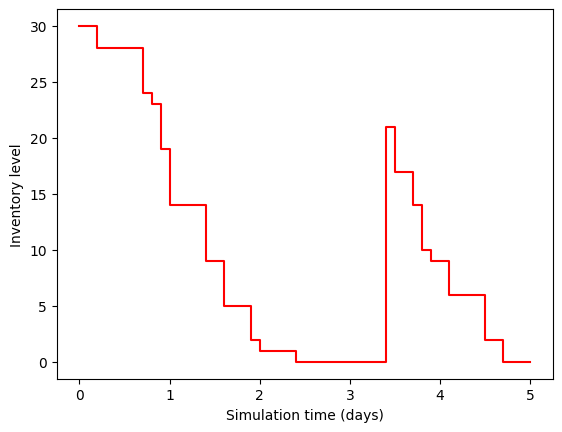

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.step(obs_time, inventory_level, where ='post', color = 'red')
plt.xlabel('Simulation time (days)')
plt.ylabel('Inventory level')

Finalmente, se importa la biblioteca Matplotlib para visualizar los resultados de la simulación. Se crea una figura y se traza una gráfica escalonada (step) del nivel de inventario en función del tiempo de simulación utilizando los datos almacenados en obs_time y inventory_level. Se establecen etiquetas para los ejes $X$ e $Y$.